In [59]:
from sklearn.datasets import make_circles, make_blobs, make_moons
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [94]:
x, y = make_circles(n_samples=1000, shuffle=True, noise=0.1, factor=0.2, random_state=0)

# print x
print(x.shape)
print(x[:10])

# print y
print(y.shape)
print(y[:10])

(1000, 2)
[[ 2.42655408e-01  3.83196035e-02]
 [ 4.43303610e-02 -5.66733409e-02]
 [-7.86777479e-01 -7.57185760e-01]
 [ 4.06719511e-03  1.31172141e-01]
 [-1.64107065e-01  1.50650143e-01]
 [ 1.56938553e-01 -4.31607283e-04]
 [ 8.85008023e-01  5.01812294e-01]
 [-1.01429157e+00  2.16806305e-01]
 [-9.49248495e-01 -7.77785366e-01]
 [-2.14254826e-01  5.15239170e-03]]
(1000,)
[1 1 0 1 1 1 0 0 0 1]


Text(0.5, 1.0, 'Blue circles and Red crosses')

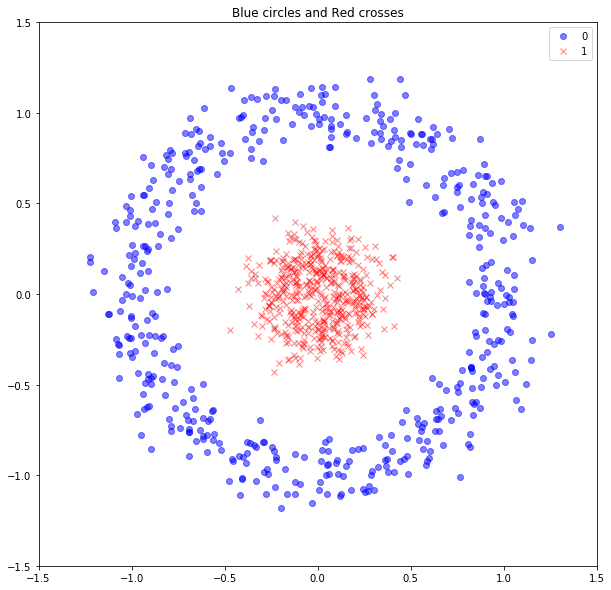

In [95]:
# we can plot the data points for better understanding

plt.figure(figsize=(10, 10))

plt.plot(x[y==0, 0], x[y==0, 1], 'ob', alpha=0.5)
plt.plot(x[y==1, 0], x[y==1, 1], 'xr', alpha=0.5)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.legend(['0','1'])
plt.title("Blue circles and Red crosses")

In [96]:
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(lr=0.5), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x, y, epochs=25)

Epoch 1/25
1000/1000 [==============================] - 0s 103us/sample - loss: 0.6936 - accuracy: 0.6110
Epoch 2/25
1000/1000 [==============================] - 0s 25us/sample - loss: 0.6572 - accuracy: 0.6970
Epoch 3/25
1000/1000 [==============================] - 0s 27us/sample - loss: 0.5891 - accuracy: 0.7960
Epoch 4/25
1000/1000 [==============================] - 0s 34us/sample - loss: 0.4992 - accuracy: 0.8360
Epoch 5/25
1000/1000 [==============================] - 0s 31us/sample - loss: 0.4131 - accuracy: 0.8690
Epoch 6/25
1000/1000 [==============================] - 0s 32us/sample - loss: 0.3372 - accuracy: 0.8960
Epoch 7/25
1000/1000 [==============================] - 0s 38us/sample - loss: 0.2610 - accuracy: 0.9450
Epoch 8/25
1000/1000 [==============================] - 0s 35us/sample - loss: 0.1988 - accuracy: 0.9780
Epoch 9/25
1000/1000 [==============================] - 0s 34us/sample - loss: 0.1565 - accuracy: 0.9990
Epoch 10/25
1000/1000 [==============================]

[-1.5  -1.47 -1.44 -1.41 -1.38 -1.35 -1.32 -1.29 -1.26 -1.23]
[-1.5  -1.47 -1.44 -1.41 -1.38 -1.35 -1.32 -1.29 -1.26 -1.23]
(101, 101)
(101, 101)
[[-1.5  -1.47 -1.44 ...  1.44  1.47  1.5 ]
 [-1.5  -1.47 -1.44 ...  1.44  1.47  1.5 ]
 [-1.5  -1.47 -1.44 ...  1.44  1.47  1.5 ]
 ...
 [-1.5  -1.47 -1.44 ...  1.44  1.47  1.5 ]
 [-1.5  -1.47 -1.44 ...  1.44  1.47  1.5 ]
 [-1.5  -1.47 -1.44 ...  1.44  1.47  1.5 ]]
[[-1.5  -1.5  -1.5  ... -1.5  -1.5  -1.5 ]
 [-1.47 -1.47 -1.47 ... -1.47 -1.47 -1.47]
 [-1.44 -1.44 -1.44 ... -1.44 -1.44 -1.44]
 ...
 [-1.29 -1.29 -1.29 ... -1.29 -1.29 -1.29]
 [-1.26 -1.26 -1.26 ... -1.26 -1.26 -1.26]
 [-1.23 -1.23 -1.23 ... -1.23 -1.23 -1.23]]
(10201, 2)
[[-1.5  -1.5 ]
 [-1.47 -1.5 ]
 [-1.44 -1.5 ]
 [-1.41 -1.5 ]
 [-1.38 -1.5 ]
 [-1.35 -1.5 ]
 [-1.32 -1.5 ]
 [-1.29 -1.5 ]
 [-1.26 -1.5 ]
 [-1.23 -1.5 ]]
1.5676022e-05
0.99319863


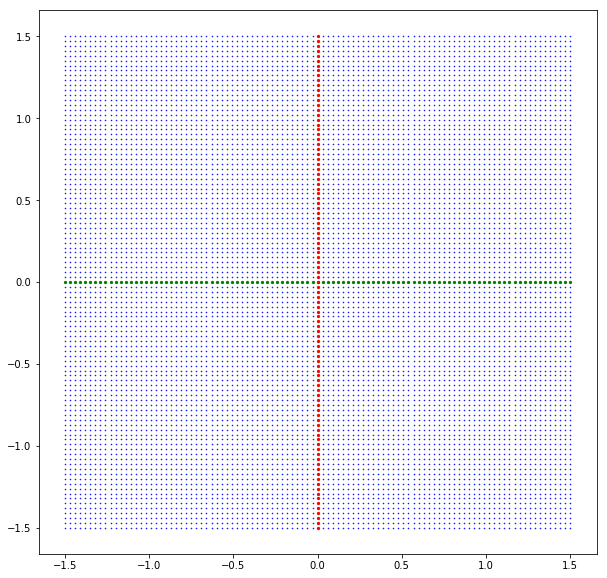

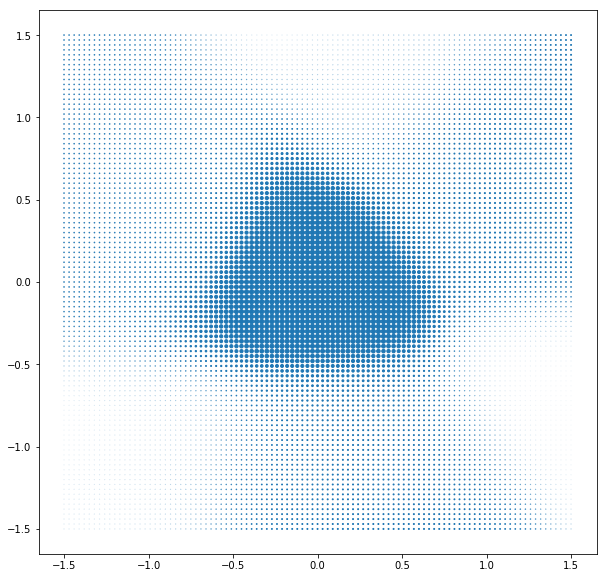

In [97]:
# Our data varies roughly between -1.5 and 1.5 along both axes,
# so let’s build a grid of equally spaced horizontal lines and vertical lines 
# between these two extremes.

hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)

# print hticks
print(hticks[:10])

# print vticks
print(vticks[:10])

aa, bb = np.meshgrid(hticks, vticks)

print(aa.shape)
print(bb.shape)
print(aa[:10])
print(bb[:10])

# lets draw the points as figure to get a sense of data
plt.figure(figsize=(10, 10))
plt.scatter(aa, bb, s=0.3, color='blue')
# highlight one horizontal series of grid points
plt.scatter(aa[50], bb[50], s=5, color='green')
# highlight one vertical series of grid points
plt.scatter(aa[:, 50], bb[:, 50], s=5, color='red')

ab = np.c_[aa.ravel(), bb.ravel()]
print(ab.shape)
print(ab[:10])

c = model.predict(ab)
# check for the predicted result
print(c.min())
print(c.max())

cc = c.reshape(aa.shape)
plt.figure(figsize=(10, 10))
plt.scatter(aa, bb, s=20*cc)

In [102]:
def plot_decision_boundary(model, x, y):
    hticks = np.linspace(x.min()-1.5, x.max()+1.5, 101)
    vticks = np.linspace(x.min()-1.5, x.max()+1.5, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    plt.figure(figsize=(10, 10))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(x[y==0, 0], x[y==0, 1], 'ob', alpha=0.5)
    plt.plot(x[y==1, 0], x[y==1, 1], 'xr', alpha=0.5)
    plt.title("Blue circles and Red crosses")

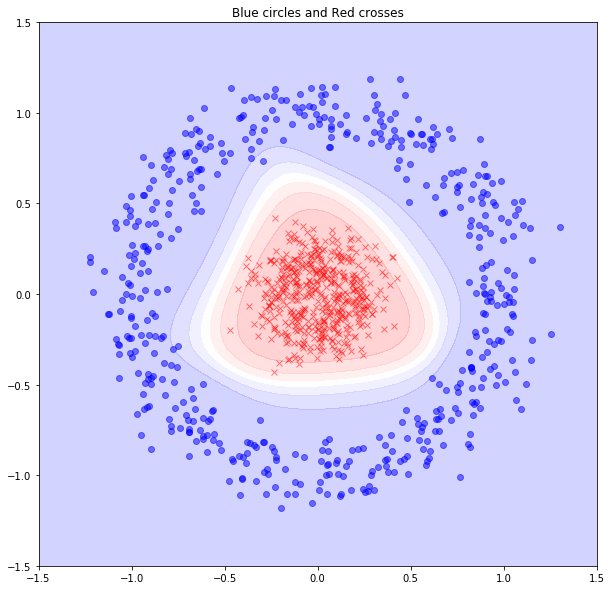

In [99]:
plot_decision_boundary(model, x, y)

Epoch 1/25
1000/1000 [==============================] - 0s 104us/sample - loss: 0.2659 - accuracy: 0.8860
Epoch 2/25
1000/1000 [==============================] - 0s 22us/sample - loss: 0.1797 - accuracy: 0.9330
Epoch 3/25
1000/1000 [==============================] - 0s 24us/sample - loss: 0.1457 - accuracy: 0.9500
Epoch 4/25
1000/1000 [==============================] - 0s 31us/sample - loss: 0.1383 - accuracy: 0.9500
Epoch 5/25
1000/1000 [==============================] - 0s 23us/sample - loss: 0.1414 - accuracy: 0.9450
Epoch 6/25
1000/1000 [==============================] - 0s 29us/sample - loss: 0.1317 - accuracy: 0.9490
Epoch 7/25
1000/1000 [==============================] - 0s 30us/sample - loss: 0.1295 - accuracy: 0.9490
Epoch 8/25
1000/1000 [==============================] - 0s 23us/sample - loss: 0.1283 - accuracy: 0.9530
Epoch 9/25
1000/1000 [==============================] - 0s 36us/sample - loss: 0.1270 - accuracy: 0.9510
Epoch 10/25
1000/1000 [==============================]

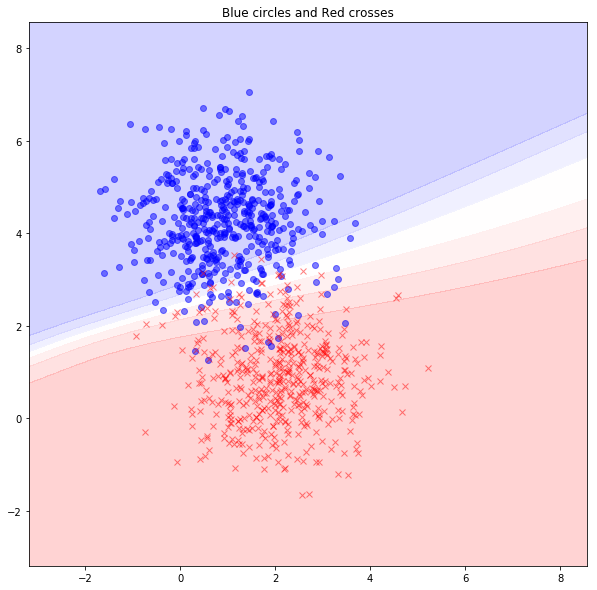

In [107]:
x, y = make_blobs(n_samples=1000, centers=2, random_state=0)

blobs_model = Sequential()
blobs_model.add(Dense(4, input_shape=(2,), activation='tanh'))
blobs_model.add(Dense(1, activation='sigmoid'))
blobs_model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
blobs_model.fit(x, y, epochs=25)
plot_decision_boundary(blobs_model, x, y)


In [109]:
x, y = make_moons(n_samples=100, noise=0.1, random_state=0)
moon_model = Sequential()
moon_model.add(Dense())